Пусть вероятность перегорания рабочей  лампы в течение суток равна  р = const = 0.1% . Чему равен средний срок безотказной работы лампы? (ради простоты считаем, что  лампа включена в сеть всегда ).

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import timeit

In [95]:
p = 0.1/100 # вероятность перегорания лампы в течение 1 суток
n = int(1/p) # число суток, через которые лампа перегорит с вероятностью 100%
N = 10000 # кол-во ламп

def days_life(): # Возвращает кол-во суток до отказа 1 лампы
    days = 0
    for j in range(10*n):
        lamplife = np.random.randint(0,n+1)
        if lamplife == 1000:
            return days
        else:
            days += 1
def model(N): # Возвращает список отказов для N ламп
    days_to_failure = []
    prob = []
    for i in range(N):
        days_to_failure.append(days_life())
    return days_to_failure, prob

days_to_failure, prob = model(N)

In [96]:
df = pd.DataFrame(days_to_failure, columns=['Срок службы'])

In [97]:
df.describe()

,Срок службы
count,10000.000000
mean,995.735200
std,990.883966
min,0.000000
25%,286.000000
50%,690.000000
75%,1401.000000
max,8939.000000


In [98]:
df['Срок службы'].mean()

995.7352

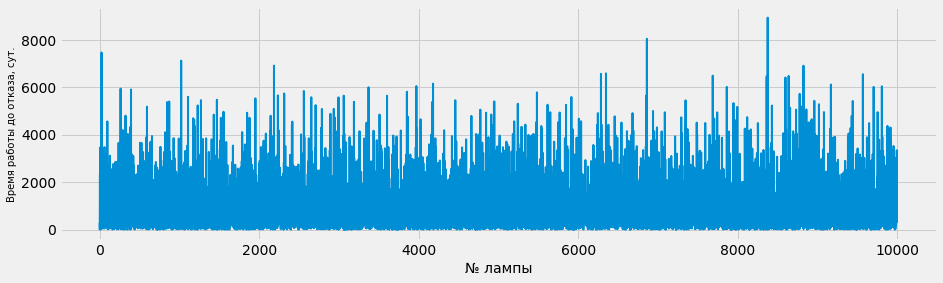

In [99]:
plt.figure(figsize=(14,4))
plt.plot(df['Срок службы'],linewidth=2)
plt.xlabel('№ лампы',fontsize=14)
plt.ylabel('Время работы до отказа, сут.',fontsize=10)
plt.show()    

In [100]:
p = 0.1/100 # вероятность перегорания лампы в течение 1 суток
n = int(1/p) # число суток, через которые лампа перегорит с вероятностью 100%
N = 10000
def timeline(N):
    count_days = 0
    count_lamp = N # кол-во рабочих ламп
    lamps_left = []
    days = []
    prob = []
    while count_lamp > 0:
        for i in range(count_lamp):
            dice = np.random.randint(0,n+1)
            if dice == 1000:
                count_lamp = count_lamp - 1
        count_days += 1
        lamps_left.append(count_lamp)   
        days.append(count_days)
        prob.append(count_days/(N-count_lamp))
    return lamps_left, days, prob
lamps_left, days, prob = timeline(N)

In [101]:
df1 = pd.DataFrame(days, columns=['Day'])
df1['Lamp left'] = lamps_left
df1['Probability'] = prob

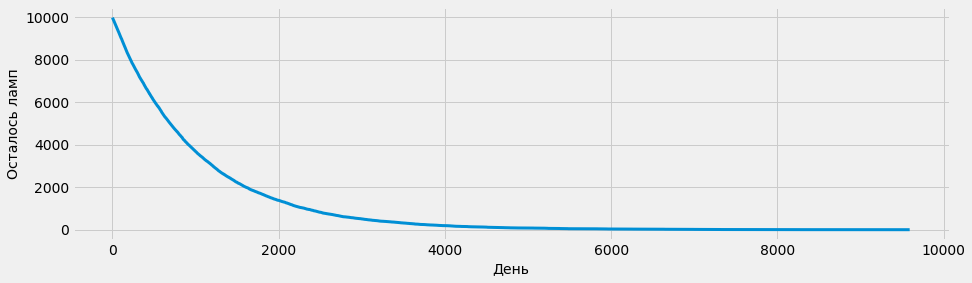

In [102]:
plt.figure(figsize=(14,4))
plt.plot(df1['Day'], df1['Lamp left'],linewidth=3)
plt.xlabel('День',fontsize=14)
plt.ylabel('Осталось ламп',fontsize=14)
plt.show()    

In [124]:
P_1000 = df1.loc[df1['Day']==1000,'Lamp left']/N # Вероятность того, что лампа проработает 1000 дней без отказа
W = N / df1['Day'].max() # Относительная частота событий
d = df1['Day'].max()
mean = df['Срок службы'].mean()

In [127]:
print(f'Вероятность безотказной работы лампы 1000 дней (P_1000): {P_1000}')
print(f'{N} ламп перегорит за {d} дня')
print(f'Относительная частота событий (W): {W}')
print(f'Средний срок безотказной службы лампы: {mean} суток')

Вероятность безотказной работы лампы 1000 дней (P_1000): 999    0.3687
Name: Lamp left, dtype: float64
10000 ламп перегорит за 9592 дня
Относительная частота событий (W): 1.042535446205171
Средний срок безотказной службы лампы: 995.7352 суток


In [123]:
# Смотрит быстродействие отработки функций
t1 = timeit.timeit("model(10000)", setup="from __main__ import model, days_life", number=1)
t2 = timeit.timeit("timeline(10000)", setup="from __main__ import timeline", number=1)
print(f"timeit тест 1-й модели: {t1} ")
print(f"timeit тест 2-й модели: {t2} ")

timeit тест 1-й модели: 29.905053714001042 
timeit тест 2-й модели: 28.875028061000194 
